In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install missingno
import pandas as pd
import sklearn.mixture as mix

import numpy as np
import scipy.stats as scs

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import missingno as msno
from tqdm import tqdm
p=print

## Installing the HMMLearn

In [3]:
!pip install hmmlearn
from hmmlearn.hmm import GaussianHMM

     |████████████████████████████████| 374 kB 5.3 MB/s 


## Importing the files

In [44]:
input=pd.read_csv('input (3).csv')
output=pd.read_csv('output (4).csv')

In [45]:
input.head()

,ma_2,ma_4,ma_8,ma_16,ma_32,ma_64,ma_128,rsi_2,rsi_4,rsi_8,rsi_16,rsi_32,rsi_64,rsi_128,std_2,std_4,std_8,std_16,std_32,std_64,std_128
0,0.000000,0.148490,0.465176,0.406655,0.441972,0.400000,0.364048,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.846711,1.000000,0.873581,0.761026,0.718475,0.671991
1,0.314378,0.316834,0.551565,0.407407,0.409430,0.421716,0.361461,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.580198,0.696103,0.892860,0.815665,0.737646,0.706839,0.665107
2,0.633047,0.484060,0.579340,0.431472,0.418988,0.433214,0.366764,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.007921,0.699247,0.801525,0.770343,0.713862,0.694634,0.658464
3,0.743562,0.761745,0.588955,0.474953,0.441719,0.445021,0.357480,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.196040,0.194752,0.731544,0.739580,0.693528,0.683034,0.652202
4,0.780043,0.764262,0.571246,0.502162,0.436200,0.456171,0.361738,0.567915,0.738632,0.784703,0.790679,0.776671,0.752676,0.735526,0.128713,0.191717,0.679090,0.708503,0.673319,0.671914,0.645823


In [46]:
output.head()

,Open_ret
0,0.00000
1,0.00003
2,-0.00002
3,-0.00017
4,0.00007


## Creating Train Data and Test Data

In [47]:
df=pd.concat([input, output],axis=1)

In [48]:
df.head()

,ma_2,ma_4,ma_8,ma_16,ma_32,ma_64,ma_128,rsi_2,rsi_4,rsi_8,rsi_16,rsi_32,rsi_64,rsi_128,std_2,std_4,std_8,std_16,std_32,std_64,std_128,Open_ret
0,0.000000,0.148490,0.465176,0.406655,0.441972,0.400000,0.364048,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.846711,1.000000,0.873581,0.761026,0.718475,0.671991,0.00000
1,0.314378,0.316834,0.551565,0.407407,0.409430,0.421716,0.361461,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.580198,0.696103,0.892860,0.815665,0.737646,0.706839,0.665107,0.00003
2,0.633047,0.484060,0.579340,0.431472,0.418988,0.433214,0.366764,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.007921,0.699247,0.801525,0.770343,0.713862,0.694634,0.658464,-0.00002
3,0.743562,0.761745,0.588955,0.474953,0.441719,0.445021,0.357480,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.196040,0.194752,0.731544,0.739580,0.693528,0.683034,0.652202,-0.00017
4,0.780043,0.764262,0.571246,0.502162,0.436200,0.456171,0.361738,0.567915,0.738632,0.784703,0.790679,0.776671,0.752676,0.735526,0.128713,0.191717,0.679090,0.708503,0.673319,0.671914,0.645823,0.00007


In [50]:
cols_features = ['ma_2','rsi_2','std_2']

train_set = df[cols_features].values[:5000]
test_set = df[cols_features].values[5000:]

In [51]:
train_set

array([[0.        , 1.        , 0.        ],
       [0.31437768, 1.        , 0.58019802],
       [0.63304721, 1.        , 0.00792079],
       ...,
       [0.65343348, 0.66170764, 0.00990099],
       [0.64914163, 0.67957883, 0.0019802 ],
       [0.66309013, 0.85871232, 0.02376238]])

## Plots of Features

<Figure size 1440x2160 with 0 Axes>

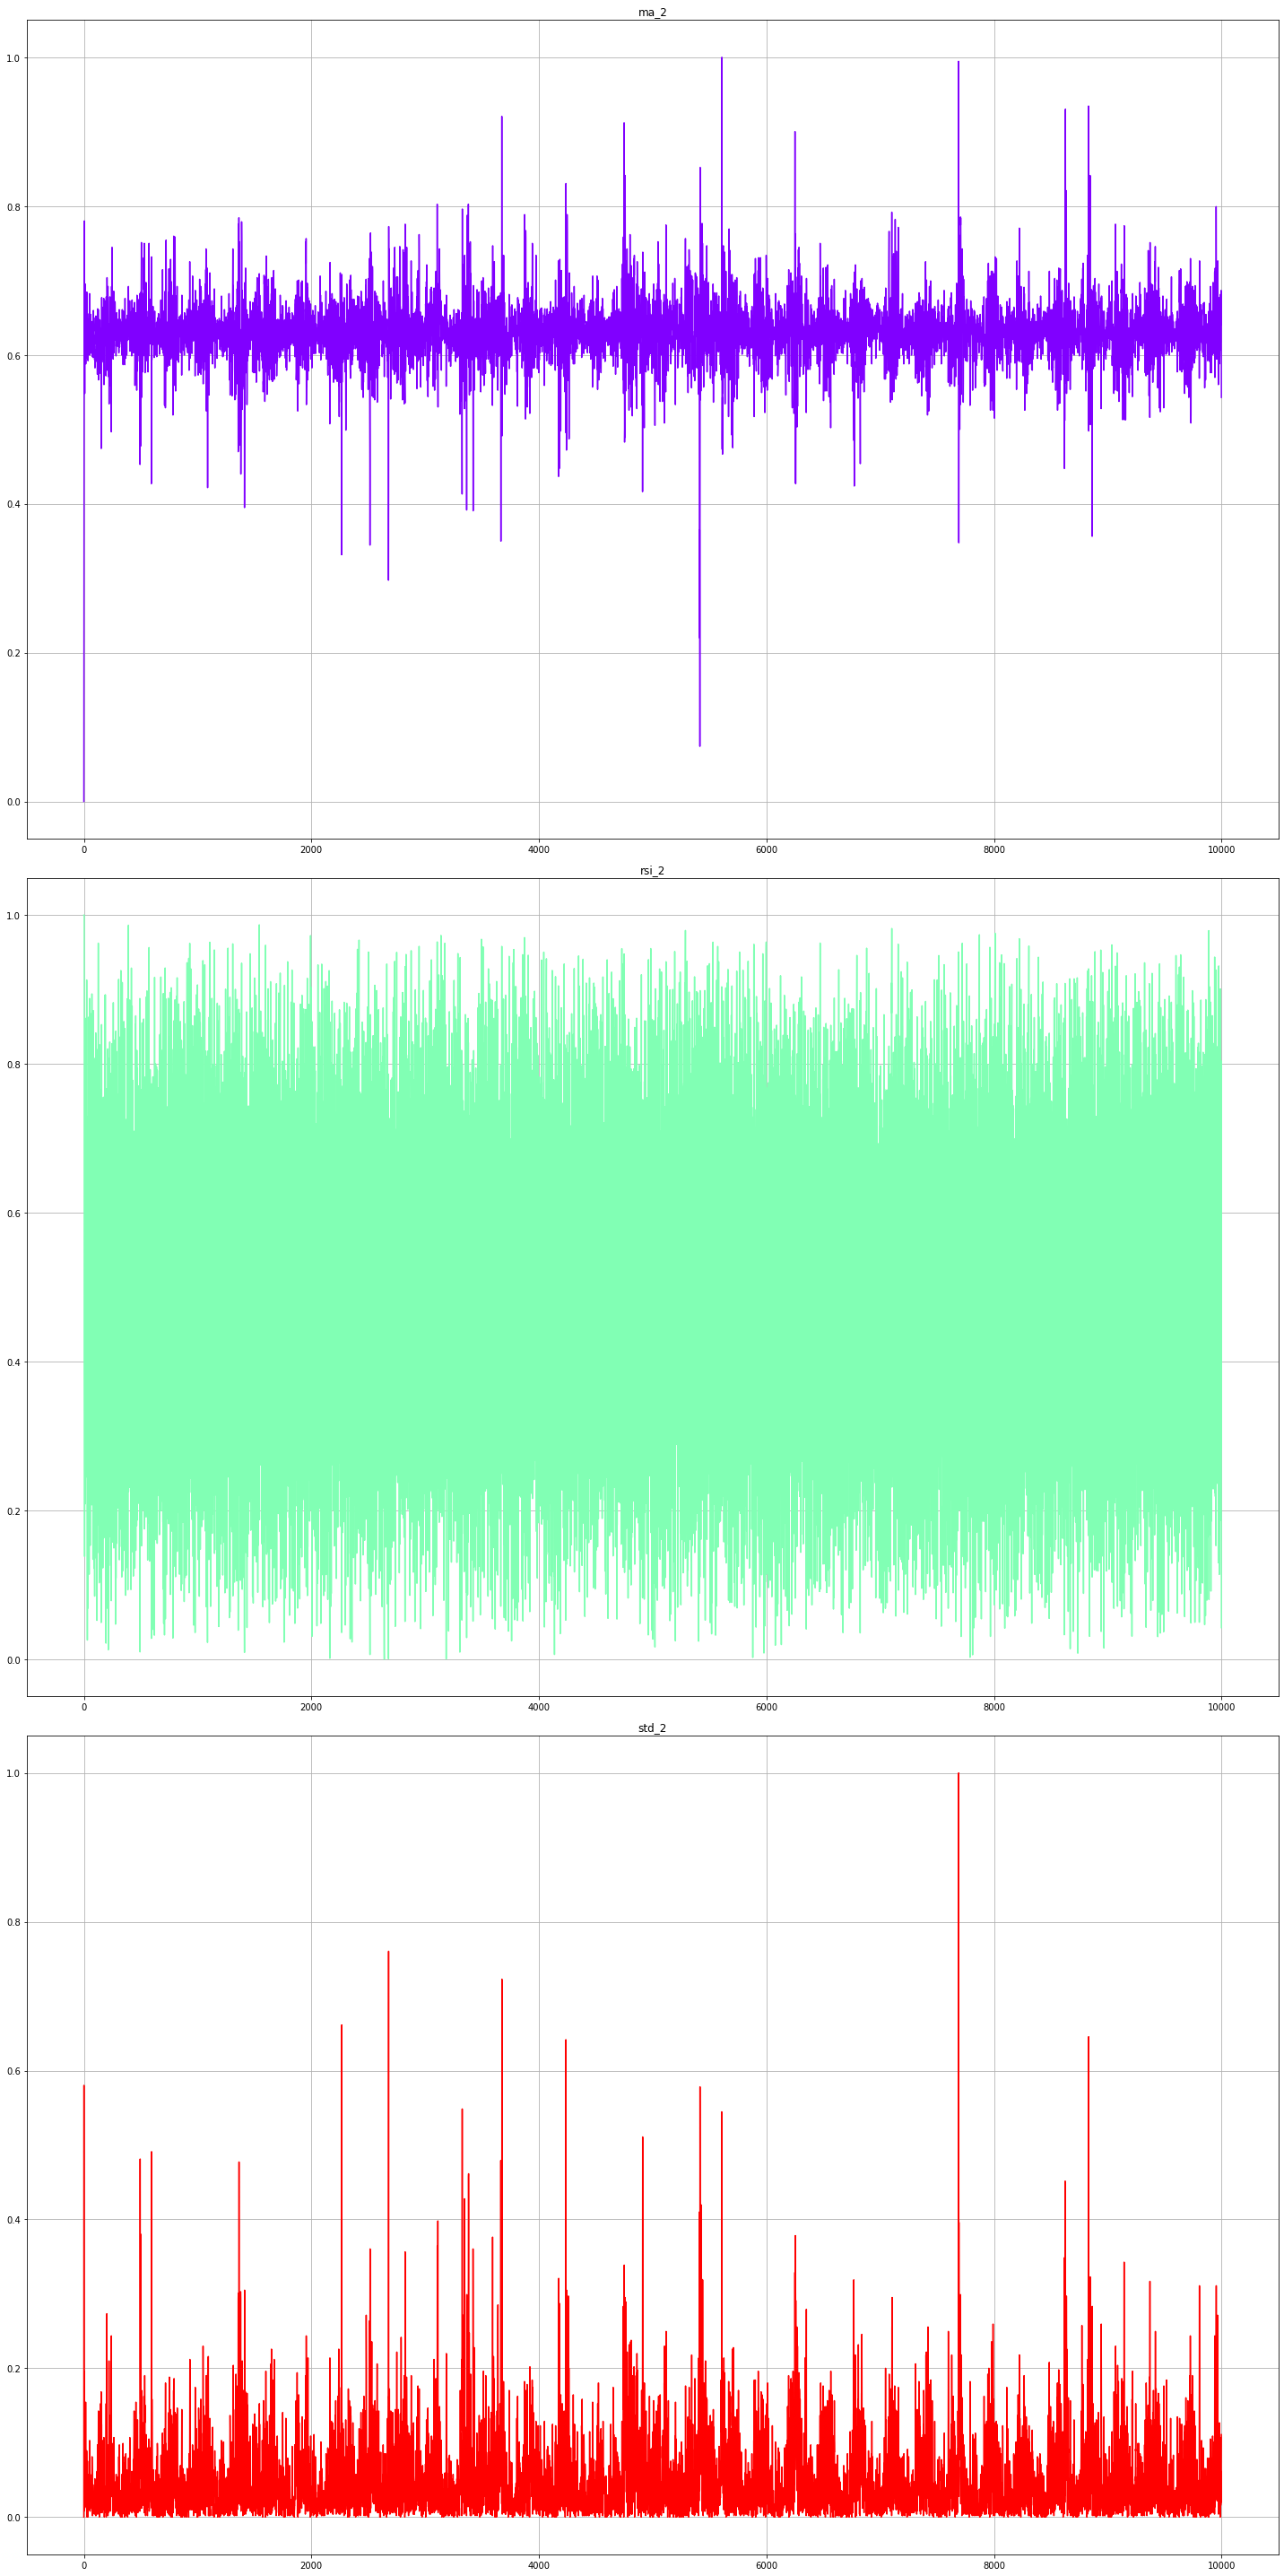

In [54]:
plt.figure(figsize=(20,30))
fig, axs = plt.subplots(len(cols_features), 1, figsize = (20,40))
colours = cm.rainbow(np.linspace(0, 1, len(cols_features)))
for i in range(0, len(cols_features)):
    axs[i].plot(df.reset_index()[cols_features[i]], color = colours[i])
    axs[i].set_title(cols_features[i])
    axs[i].grid(True)

plt.tight_layout()

In [56]:
model = GaussianHMM(n_components=4 ,random_state=100 , algorithm='viterbi', covariance_type = "diag", n_iter=10000).fit(train_set)

In [57]:
model

GaussianHMM(n_components=4, n_iter=10000, random_state=100)

## Plot Hidden States for OutPut Column

**Train Set**

In [58]:
column='Open_ret'

<Figure size 1800x1800 with 0 Axes>

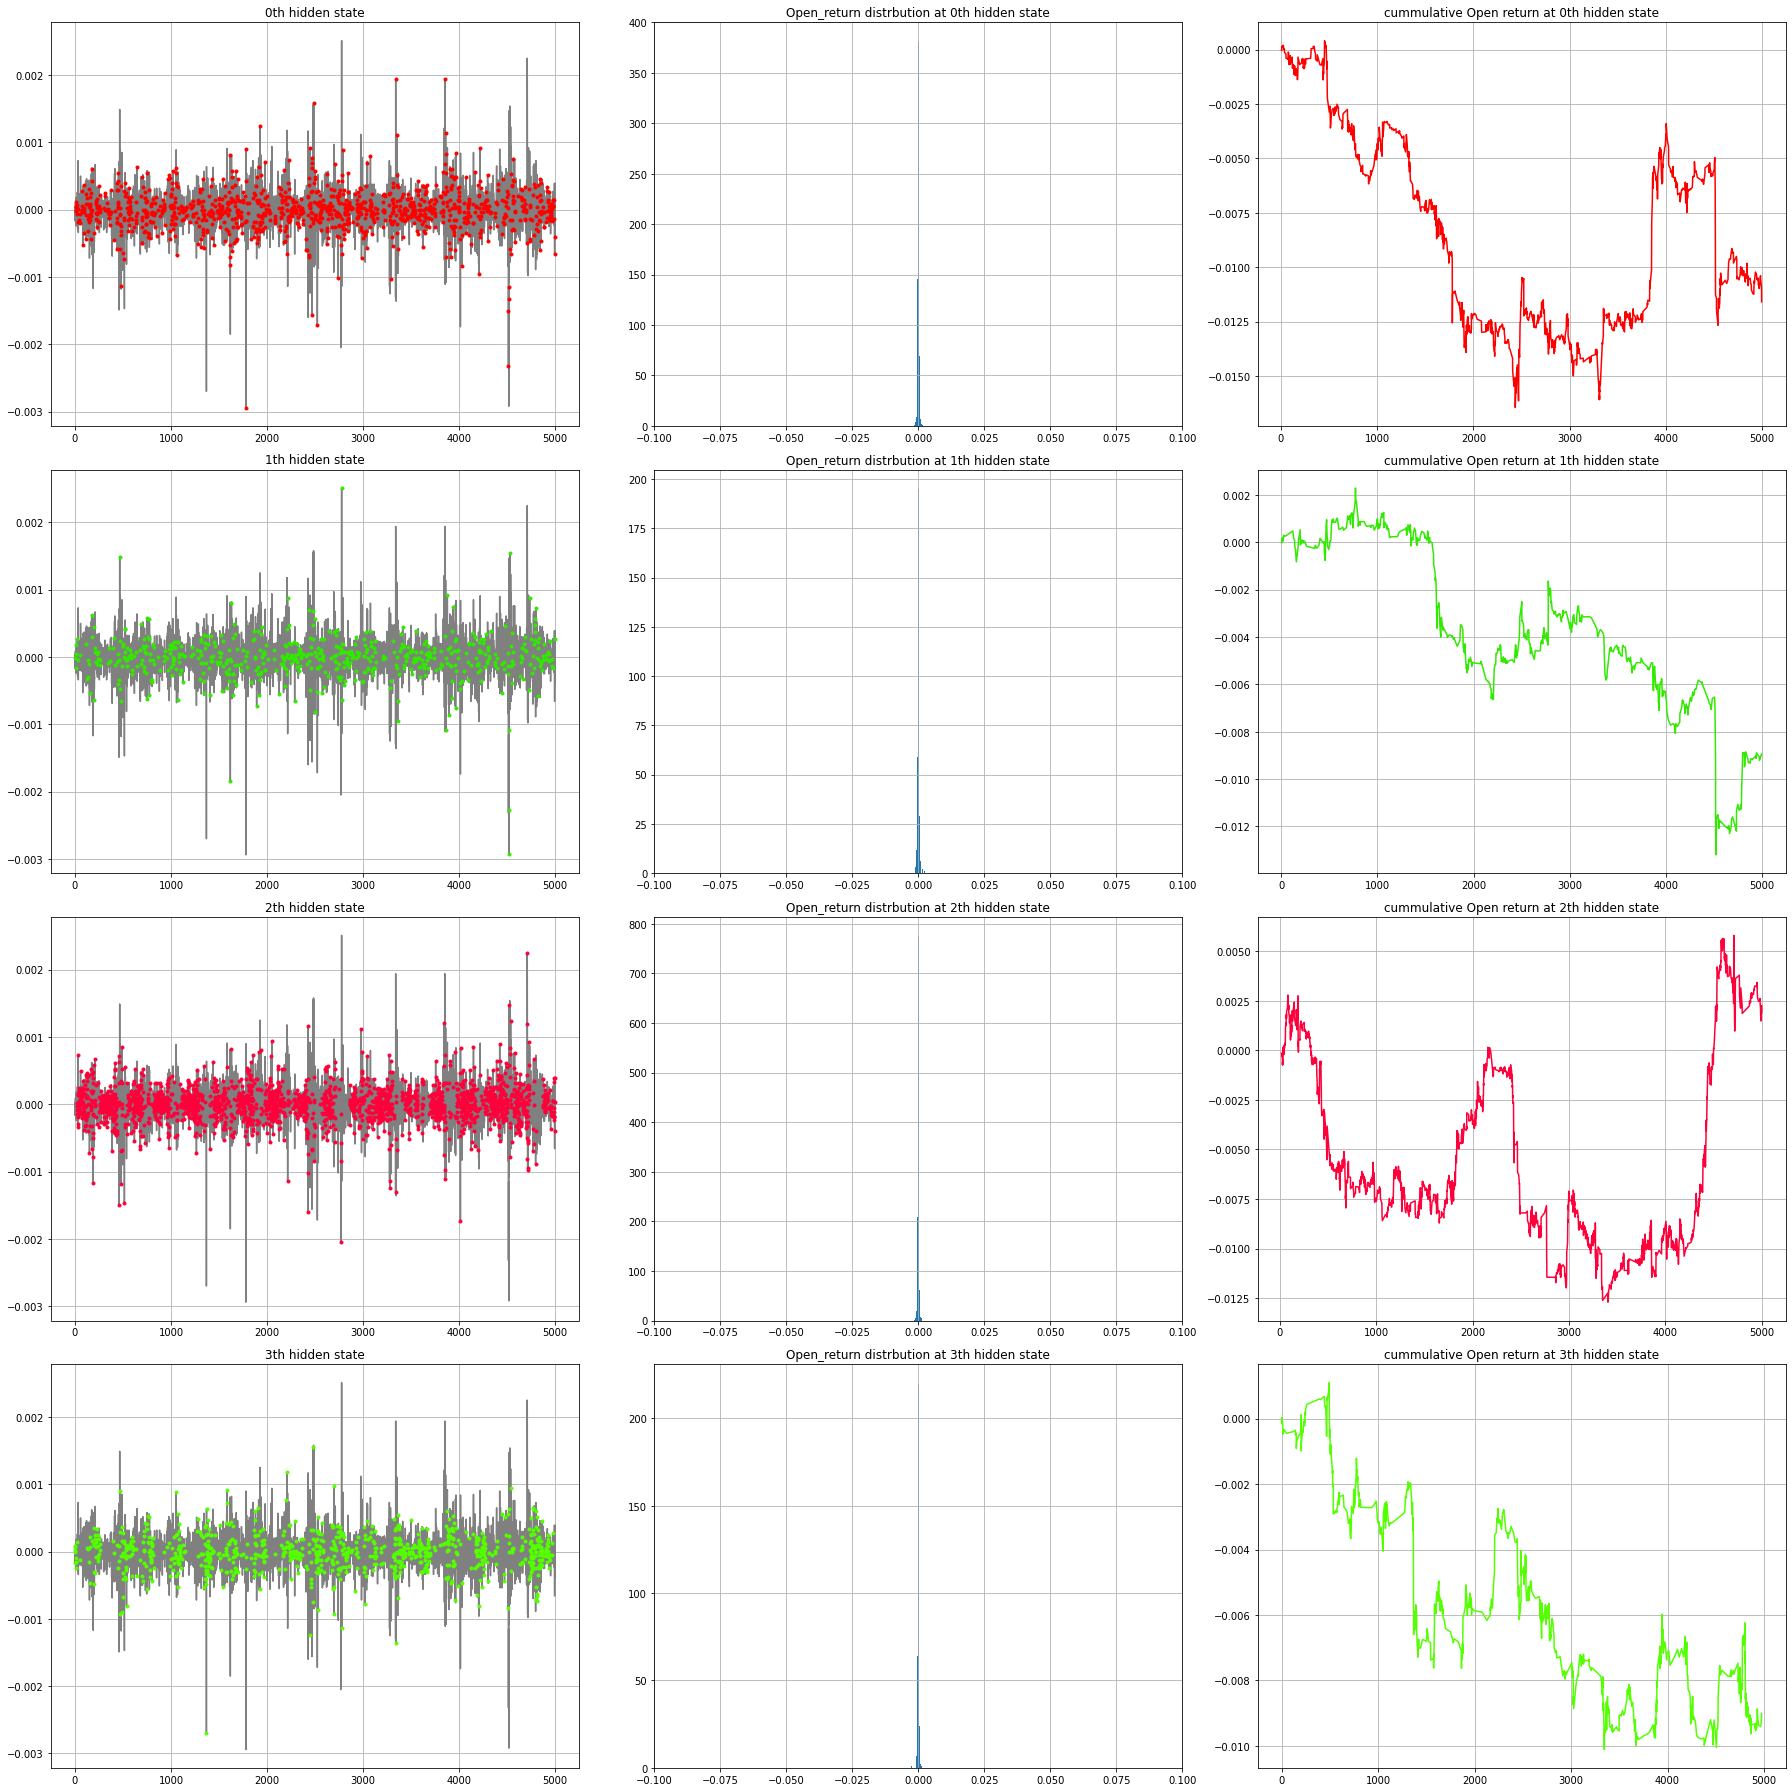

In [59]:
def plot_hidden_states(hmm_model, data, X, column):
    plt.figure(figsize=(25, 25))
    fig, axs = plt.subplots(hmm_model.n_components, 3, figsize = (25,25))
    colours = cm.prism(np.linspace(0, 1, hmm_model.n_components))
    hidden_states = model.predict(X)
    
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax[0].plot(data.index, data[column], c = 'grey')
        ax[0].plot(data.index[mask], data[column][mask], '.', c = colour)
        ax[0].set_title("{0}th hidden state".format(i))
        ax[0].grid(True)
        
        ax[1].hist(data["Open_ret"][mask], bins = 30)
        ax[1].set_xlim([-0.1, 0.1])
        ax[1].set_title("Open_return distrbution at {0}th hidden state".format(i))
        ax[1].grid(True)
        
        ax[2].plot(data["Open_ret"][mask].cumsum(), c = colour)
        ax[2].set_title("cummulative Open return at {0}th hidden state".format(i))
        ax[2].grid(True)
        
    plt.tight_layout()

plot_hidden_states(model, df[:5000], train_set, column)

## Mean of Hidden States of Train Set

In [60]:
print("Means of each hidden state of Train Set")
for i in range(model.n_components):
    print("{0} hidden state".format(i))
    print("mean = ", model.means_[i])
    print()
    print('$-'*300)
    print()

Means of each hidden state of Train Set
0 hidden state
mean =  [0.60320265 0.38064151 0.04671619]

$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-

1 hidden state
mean =  [0.6568686  0.79854008 0.07934148]

$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-

**Test Set**

<Figure size 1800x1800 with 0 Axes>

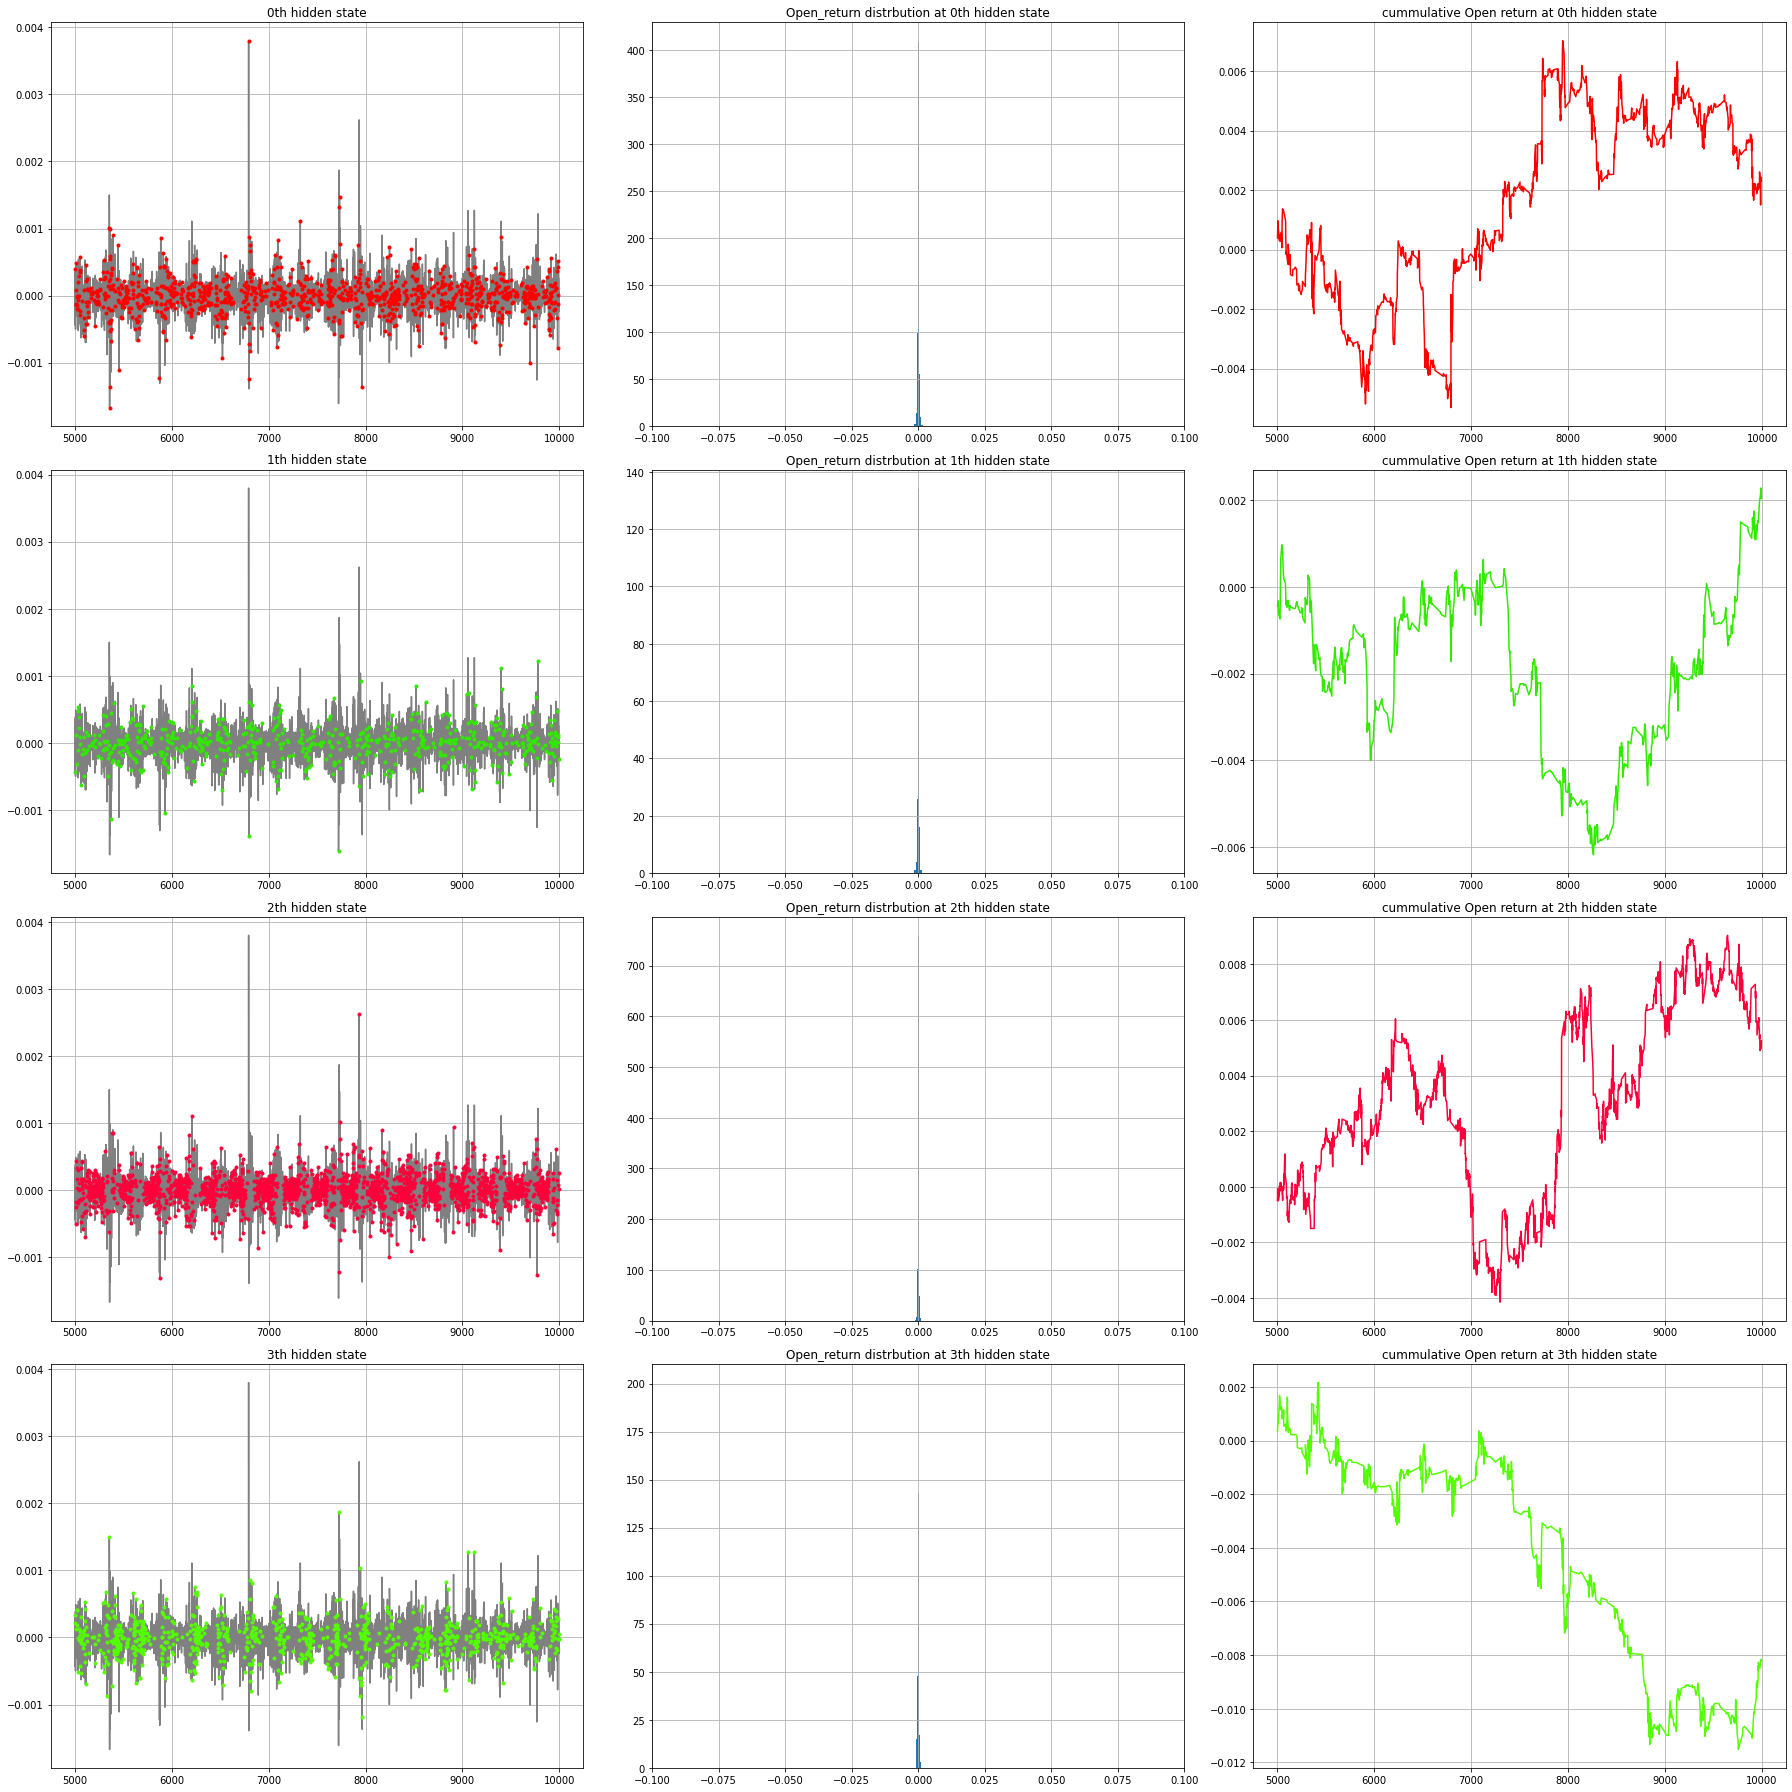

In [61]:
def plot_hidden_states(hmm_model, data, X, column):
    plt.figure(figsize=(25, 25))
    fig, axs = plt.subplots(hmm_model.n_components, 3, figsize = (25,25))
    colours = cm.prism(np.linspace(0, 1, hmm_model.n_components))
    hidden_states = model.predict(X)
    
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax[0].plot(data.index, data[column], c = 'grey')
        ax[0].plot(data.index[mask], data[column][mask], '.', c = colour)
        ax[0].set_title("{0}th hidden state".format(i))
        ax[0].grid(True)
        
        ax[1].hist(data["Open_ret"][mask], bins = 30)
        ax[1].set_xlim([-0.1, 0.1])
        ax[1].set_title("Open_return distrbution at {0}th hidden state".format(i))
        ax[1].grid(True)
        
        ax[2].plot(data["Open_ret"][mask].cumsum(), c = colour)
        ax[2].set_title("cummulative Open return at {0}th hidden state".format(i))
        ax[2].grid(True)
        
    plt.tight_layout()

plot_hidden_states(model, df[5000:], test_set, column)

In [62]:
model.fit(test_set)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


GaussianHMM(n_components=4, n_iter=10000, random_state=100)

## Mean of Hidden States of Test Set

In [63]:
print("Means of each hidden state of Test Set")
for i in range(model.n_components):
    print("{0} hidden state".format(i))
    print("mean = ", model.means_[i])
    print()
    print('$-'*300)
    print()

Means of each hidden state of Test Set
0 hidden state
mean =  [0.5924516  0.17562459 0.07869501]

$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-

1 hidden state
mean =  [0.6574965  0.57310692 0.05315038]

$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$

## Comparision Of Hidden States of Input Features


In [66]:
def mean_confidence_interval(vals, confidence):
    a = 1.0 * np.array(vals)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m - h, m, m + h

def compare_hidden_states(hmm_model, cols_features, conf_interval, iters = 1000):
    plt.figure(figsize=(15, 15))
    fig, axs = plt.subplots(len(cols_features), hmm_model.n_components, figsize = (20,30))
    colours = cm.prism(np.linspace(0, 1, hmm_model.n_components))
    
    for i in range(0, model.n_components):
        mc_df = pd.DataFrame()
    
        # Samples generation
        for j in range(0, iters):
            row = np.transpose(hmm_model._generate_sample_from_state(i))
            mc_df = mc_df.append(pd.DataFrame(row).T)
        mc_df.columns = cols_features
    
        for k in range(0, len(mc_df.columns)):
            axs[k][i].hist(mc_df[cols_features[k]], color = colours[i])
            axs[k][i].set_title(cols_features[k] + " (state " + str(i) + "): " + str(np.round(mean_confidence_interval(mc_df[cols_features[k]], conf_interval), 3)))
            axs[k][i].grid(True)
            
    plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

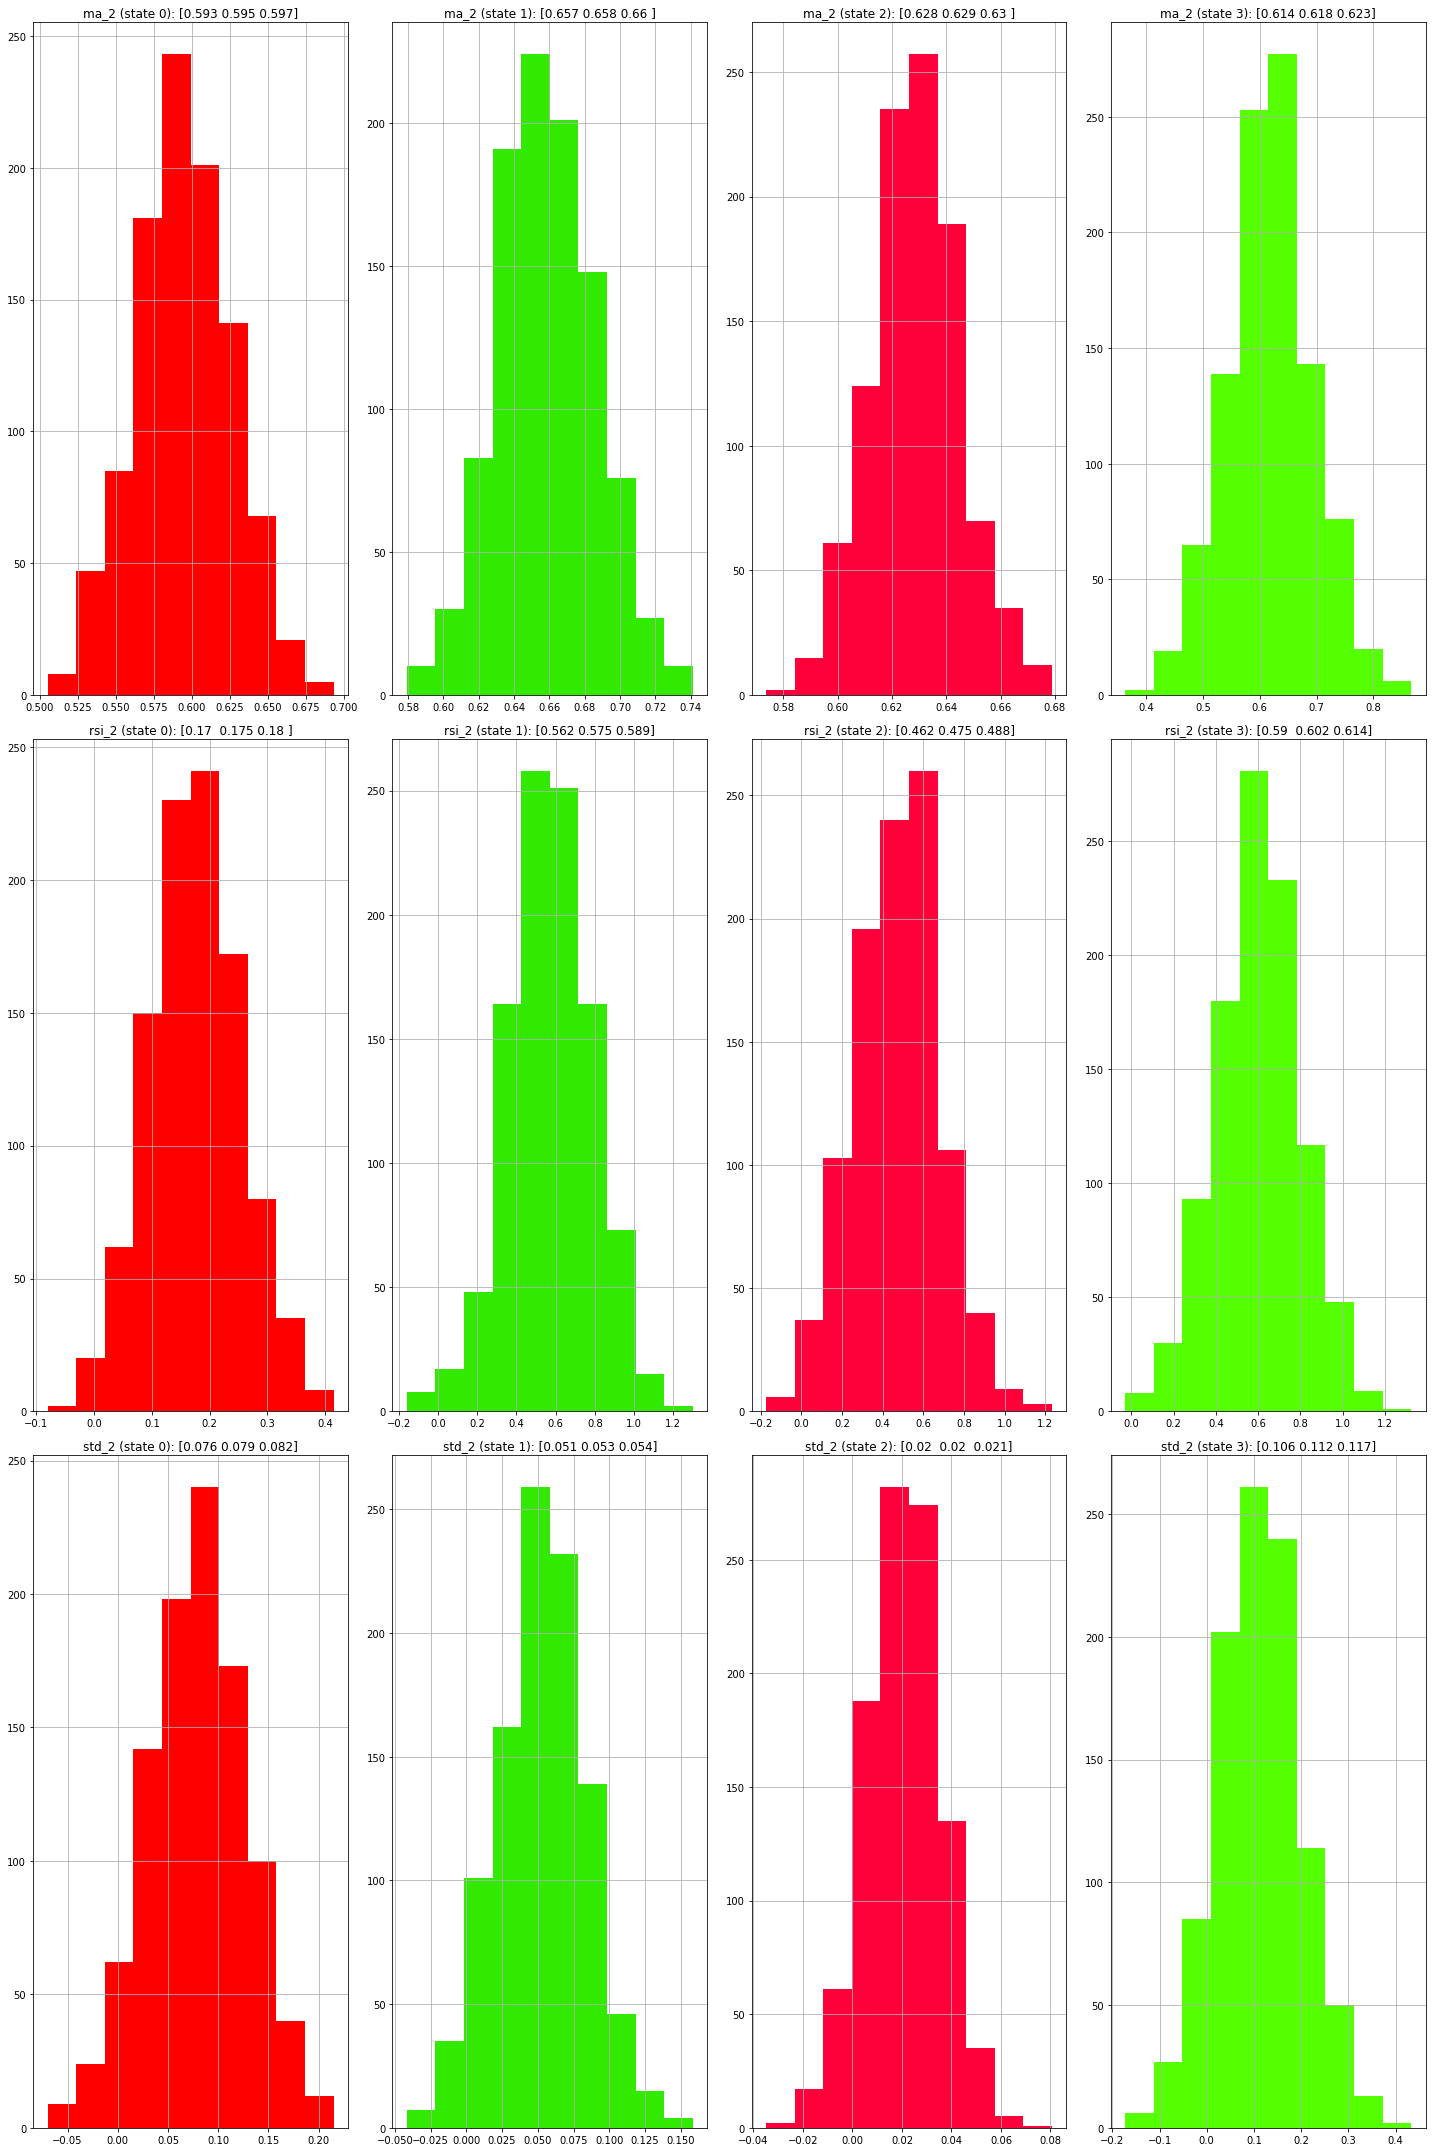

In [67]:
import scipy.integrate as integrate
import scipy
compare_hidden_states(hmm_model=model, cols_features=cols_features, conf_interval=0.95)

## Saving The Model as a Pickle File

In [68]:
import pickle
Saved_HMM_model = pickle.dumps(model)

## Loading the Saved Model

In [69]:
HMM_model = pickle.loads(Saved_HMM_model)

## Predicting the output of last 5 points from the test set

In [71]:
inp=pd.read_csv('input (3).csv')
test=inp.iloc[-5:,:]

In [76]:
test_final=test[['ma_2','rsi_2','std_2']]

In [77]:
Predictions=HMM_model.predict_proba(test_final)
print("The Hidden States probabilities corresponding to the last 5 inputs are:")
Predictions

The Hidden States probabilities corresponding to the last 5 inputs are:


array([[0.00000000e+000, 1.00000000e+000, 1.17597070e-210,
        2.81475884e-059],
       [4.35552669e-016, 9.97896280e-001, 2.85388050e-004,
        1.81833230e-003],
       [1.01789869e-007, 9.96090703e-001, 1.92894255e-003,
        1.98025297e-003],
       [4.92825724e-001, 5.03645399e-001, 3.26209485e-003,
        2.66782624e-004],
       [9.61354601e-001, 2.12522148e-005, 1.55069682e-014,
        3.86241467e-002]])

In [78]:
Predictions=HMM_model.predict(test_set[-5:])
print("The Hidden States corresponding to the last 5 inputs are:")
Predictions

The Hidden States corresponding to the last 5 inputs are:


array([1, 1, 1, 1, 0], dtype=int32)